##  Pre-processing and Training Data Development

In [1]:
import pandas as pd
import numpy as np

In [2]:
diabetic_df = pd.read_csv('../data/diabetic_data_preprocessed.csv',low_memory=False)
diabetic_df.shape

(100241, 41)

In [3]:
diabetic_df.head().T

,0,1,2,3,4
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Female,Female,Male,Male,Male
age,10-20,20-30,30-40,40-50,70-80
num_lab_procedures,59,11,44,51,73
max_glu_serum,None,None,None,None,None
A1Cresult,None,None,None,None,None
metformin,No,No,No,No,No
repaglinide,No,No,No,No,No
nateglinide,No,No,No,No,No
chlorpropamide,No,No,No,No,No


### Feature Engineering
Create dummy features for object type features

In [4]:
diabetic_df_dummy = pd.get_dummies(diabetic_df)

#### Split the data into test and train subsamples

In [5]:
from sklearn.model_selection import train_test_split

# dont forget to define your X and y
X = diabetic_df_dummy.drop(['readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
y = diabetic_df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

### Data Modeling
#### Scale data to prep for model creation

In [6]:
#scale data
from sklearn import preprocessing

# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [7]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [8]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [9]:
clf = RandomForestClassifier(n_estimators=200, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.559
Random Forest: f1-score=0.519


## Data Modeling using Pycaret

### Setting up the Environment in PyCaret

In [10]:
from pycaret.classification import *

In [11]:
# setup the dataset
clf1 = setup(data = diabetic_df, target='readmitted', session_id=123)

,Description,Value
0,session_id,123
1,Target,readmitted
2,Target Type,Multiclass
3,Label Encoded,"<30: 0, >30: 1, NO: 2"
4,Original Data,"(100241, 41)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,39
8,Ordinal Features,False
9,High Cardinality Features,False


### Comparing All Models

In [12]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5822,0.6613,0.4042,0.5533,0.5297,0.1807,0.1974,7.0550
catboost,CatBoost Classifier,0.5812,0.6614,0.4073,0.5415,0.5332,0.1853,0.1989,14.2250
xgboost,Extreme Gradient Boosting,0.5792,0.6579,0.4062,0.5362,0.5317,0.1821,0.1953,19.3300
gbc,Gradient Boosting Classifier,0.5787,0.6566,0.3987,0.5259,0.5229,0.1690,0.1874,24.5210
ridge,Ridge Classifier,0.5747,0.0000,0.3946,0.4966,0.5175,0.1593,0.1777,0.4370
lda,Linear Discriminant Analysis,0.5747,0.6464,0.3959,0.5080,0.5194,0.1619,0.1790,0.9080
ada,Ada Boost Classifier,0.5743,0.6394,0.3953,0.5110,0.5186,0.1607,0.1779,1.8800
rf,Random Forest Classifier,0.5602,0.6284,0.3977,0.5141,0.5194,0.1542,0.1630,4.7170
et,Extra Trees Classifier,0.5428,0.6096,0.3935,0.5011,0.5118,0.1378,0.1423,7.8810
svm,SVM - Linear Kernel,0.5335,0.0000,0.3783,0.5059,0.4611,0.1082,0.1343,4.7770


### Create Models

Choosing these models for further assessment:
- Random Forest Classifier
- Extreme Gradient Boosting
- Light Gradient Boosting Machine

#### Random Forest Classifier

In [13]:
#creating a model
rf = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5583,0.6234,0.3957,0.5120,0.5170,0.1498,0.1585
1,0.5612,0.6293,0.3975,0.5141,0.5195,0.1550,0.1641
2,0.5641,0.6331,0.4000,0.5154,0.5230,0.1620,0.1710
3,0.5625,0.6306,0.3977,0.5145,0.5199,0.1561,0.1657
4,0.5584,0.6259,0.3945,0.5075,0.5166,0.1498,0.1586
Mean,0.5609,0.6284,0.3971,0.5127,0.5192,0.1545,0.1636
SD,0.0023,0.0034,0.0019,0.0028,0.0023,0.0046,0.0047


In [14]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


#### Extreme Gradient Boosting

In [15]:
xgboost = create_model('xgboost', max_depth = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5619,0.6324,0.3990,0.5152,0.5217,0.1596,0.1677
1,0.5676,0.6383,0.4054,0.5218,0.5290,0.1733,0.1814
2,0.5638,0.6416,0.4003,0.5153,0.5234,0.1629,0.1715
3,0.5591,0.6353,0.3978,0.5126,0.5202,0.1567,0.1639
4,0.5668,0.6375,0.4043,0.5175,0.5285,0.1729,0.1806
5,0.5709,0.6520,0.4107,0.5335,0.5339,0.1820,0.1896
6,0.5698,0.6421,0.4077,0.5279,0.5310,0.1762,0.1848
7,0.5686,0.6421,0.4078,0.5262,0.5307,0.1754,0.1836
8,0.5654,0.6351,0.4034,0.5222,0.5259,0.1664,0.1751
9,0.5663,0.6399,0.4072,0.5270,0.5295,0.1729,0.1803


In [16]:
print(xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)


#### Light Gradient Boosting Machine

In [17]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5760,0.6547,0.3984,0.5306,0.5225,0.1668,0.1831
1,0.5847,0.6607,0.4076,0.5632,0.5340,0.1881,0.2039
2,0.5837,0.6679,0.4049,0.5622,0.5306,0.1824,0.2000
3,0.5793,0.6588,0.4016,0.5023,0.5270,0.1756,0.1913
4,0.5820,0.6647,0.4046,0.5428,0.5301,0.1804,0.1972
5,0.5843,0.6678,0.4073,0.5628,0.5334,0.1873,0.2031
6,0.5816,0.6590,0.4040,0.5651,0.5287,0.1780,0.1955
7,0.5826,0.6620,0.4036,0.5493,0.5291,0.1805,0.1978
8,0.5830,0.6560,0.4032,0.6155,0.5287,0.1802,0.1979
9,0.5848,0.6619,0.4066,0.5394,0.5332,0.1876,0.2038


In [18]:
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Tune Models
This function automatically tunes the hyperparameters of a model using Random Grid Search on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model. 

#### Random Forest Classifier

In [19]:
# tune hyperparameters with custom_grid
params = {'n_estimators': [60, 80, 100],
          'criterion':['gini','entropy'],
          'max_depth':range(1,10,1), 
          'max_features':['auto', 'sqrt'], 
          'min_samples_split':range(2,10,2)}

tuned_rf = tune_model(rf, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5629,0.6441,0.3664,0.4925,0.4636,0.0910,0.1368
1,0.5653,0.6556,0.3673,0.5007,0.4633,0.0934,0.1450
2,0.5622,0.6522,0.3655,0.4912,0.4616,0.0886,0.1346
3,0.5641,0.6470,0.3670,0.5000,0.4634,0.0916,0.1410
4,0.5623,0.6499,0.3649,0.4927,0.4593,0.0873,0.1357
5,0.5621,0.6547,0.3644,0.4912,0.4582,0.0864,0.1349
6,0.5608,0.6435,0.3646,0.4917,0.4602,0.0854,0.1305
7,0.5652,0.6497,0.3682,0.4966,0.4660,0.0959,0.1443
8,0.5626,0.6460,0.3665,0.4889,0.4644,0.0917,0.1357
9,0.5677,0.6517,0.3695,0.5009,0.4671,0.0999,0.1522


#### Extreme Gradient Boosting

In [20]:
params = {'n_estimators':[60, 80, 100],
          'max_depth':range(1,10,2),
          'learning_rate':[0.001, 0.01, 0.1, 1.0],
          }

tuned_xgboost = tune_model(xgboost, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5780,0.6558,0.4005,0.5317,0.5251,0.1713,0.1879
1,0.5850,0.6611,0.4082,0.5699,0.5345,0.1885,0.2044
2,0.5837,0.6692,0.4057,0.5486,0.5313,0.1829,0.2005
3,0.5794,0.6599,0.4013,0.5154,0.5265,0.1746,0.1912
4,0.5830,0.6617,0.4060,0.5514,0.5317,0.1832,0.1996
5,0.5819,0.6662,0.4061,0.5564,0.5314,0.1828,0.1983
6,0.5806,0.6588,0.4017,0.5441,0.5261,0.1741,0.1925
7,0.5823,0.6598,0.4048,0.5606,0.5302,0.1814,0.1979
8,0.5831,0.6557,0.4042,0.6160,0.5297,0.1814,0.1986
9,0.5877,0.6585,0.4087,0.5478,0.5357,0.1925,0.2095


#### Light Gradient Boosting Machine

In [22]:
params = {'n_estimators':[60, 80, 100],
          'learning_rate':[0.001, 0.01, 0.1, 1.0]}

tuned_lgbm = tune_model(lgbm, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5766,0.6551,0.3988,0.5410,0.5227,0.1671,0.1840
1,0.5829,0.6608,0.4056,0.5614,0.5313,0.1831,0.1993
2,0.5834,0.6681,0.4046,0.5729,0.5301,0.1815,0.1992
3,0.5803,0.6591,0.4023,0.5035,0.5279,0.1774,0.1934
4,0.5829,0.6644,0.4045,0.5401,0.5300,0.1808,0.1984
5,0.5853,0.6672,0.4071,0.5715,0.5332,0.1873,0.2043
6,0.5826,0.6591,0.4041,0.5672,0.5290,0.1791,0.1972
7,0.5813,0.6621,0.4024,0.5591,0.5276,0.1775,0.1947
8,0.5832,0.6562,0.4034,0.6157,0.5288,0.1806,0.1985
9,0.5847,0.6617,0.4062,0.5445,0.5326,0.1866,0.2031


### Plot Models

#### Random Forest Classifier

##### Confusion Matrix

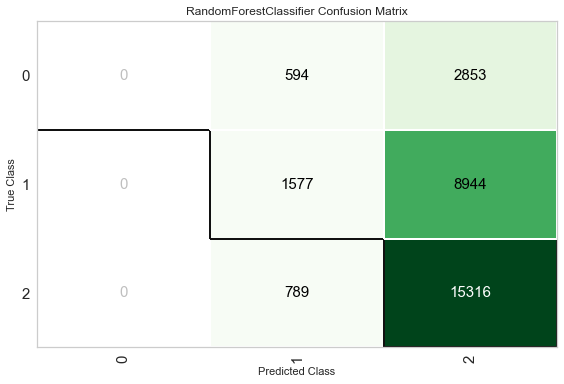

In [23]:
plot_model(tuned_rf, plot = 'confusion_matrix')

##### Classification Report

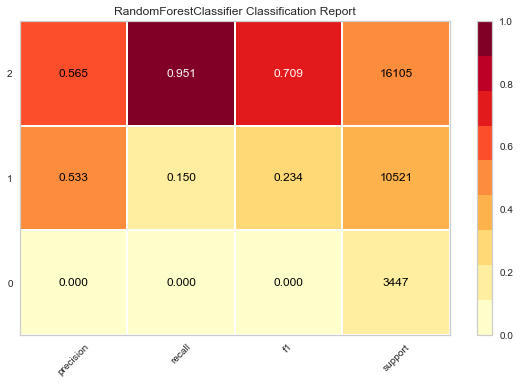

In [24]:
plot_model(tuned_rf, plot = 'class_report')

##### AUC

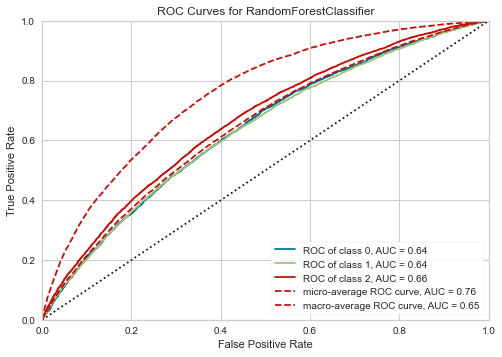

In [25]:
plot_model(tuned_rf, plot = 'auc')

##### Feature Importance

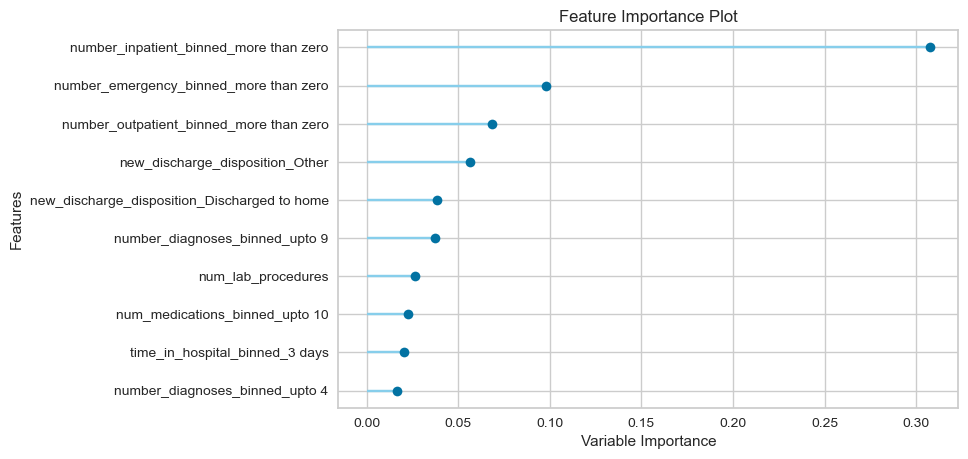

In [26]:
plot_model(tuned_rf, plot = 'feature')

##### Decision Boundary Plot

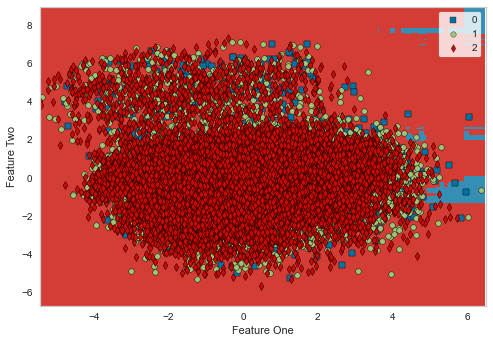

In [27]:
plot_model(tuned_rf, plot = 'boundary')

##### Prediction Error Plot

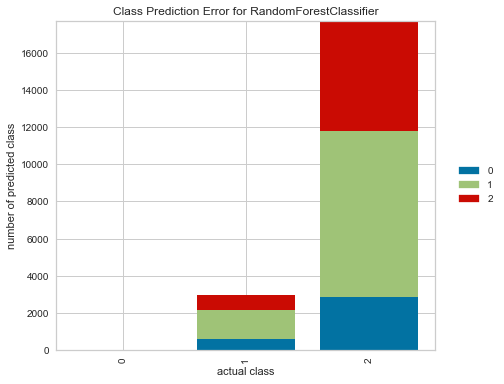

In [28]:
plot_model(tuned_rf, plot = 'error')

#### Extreme Gradient Boosting

##### Confusion Matrix

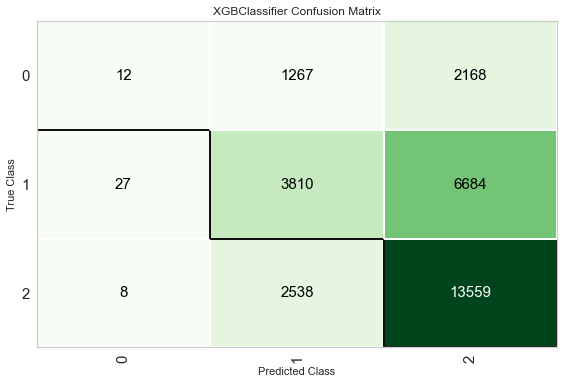

In [30]:
plot_model(tuned_xgboost, plot = 'confusion_matrix')

##### Classification Report

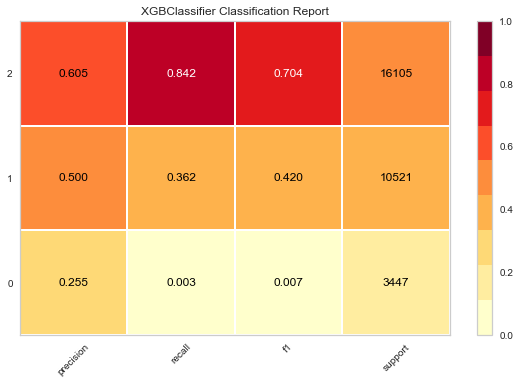

In [31]:
plot_model(tuned_xgboost, plot = 'class_report')

##### AUC

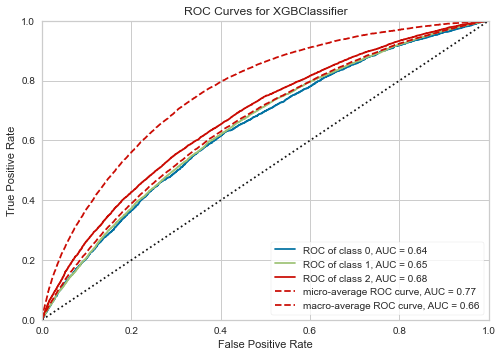

In [32]:
plot_model(tuned_xgboost, plot = 'auc')

##### Feature Importance

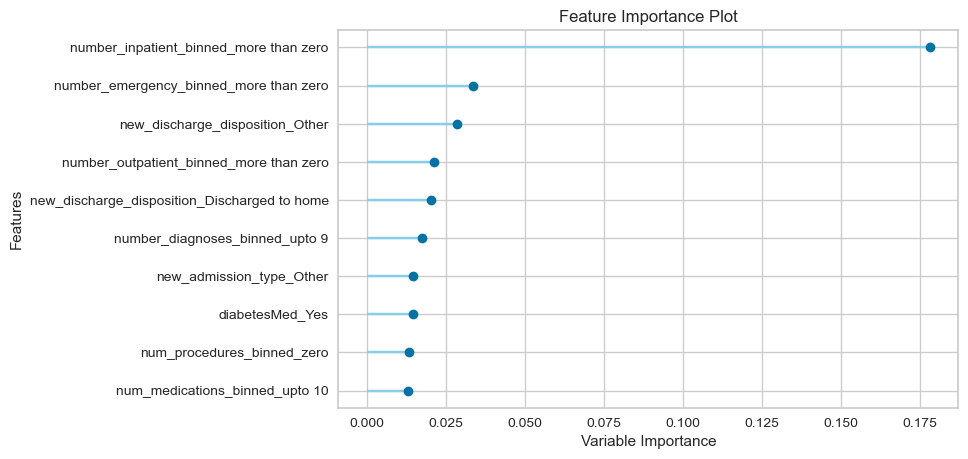

In [33]:
plot_model(tuned_xgboost, plot = 'feature')

##### Decision Boundary Plot

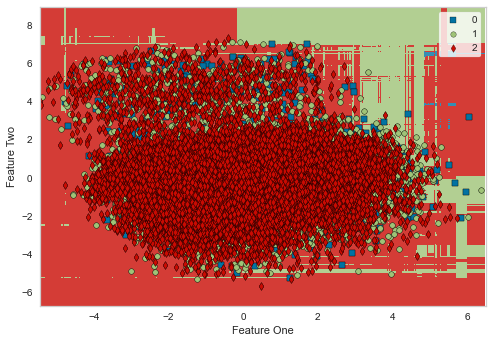

In [34]:
plot_model(tuned_xgboost, plot = 'boundary')

##### Prediction Error Plot

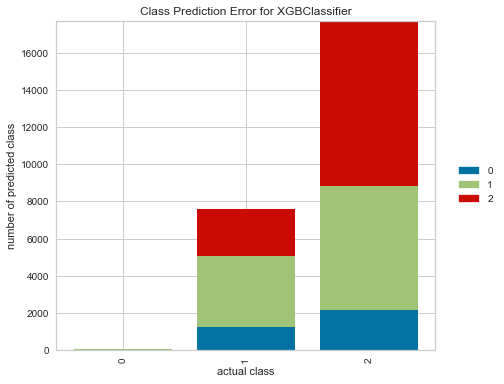

In [35]:
plot_model(tuned_xgboost, plot = 'error')

#### Light Gradient Boosting Machine

##### Confusion Matrix

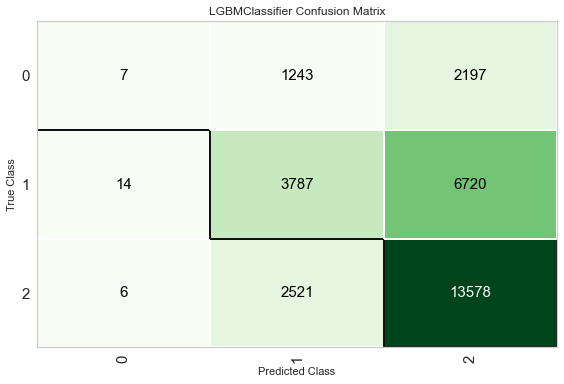

In [36]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

##### Classification Report

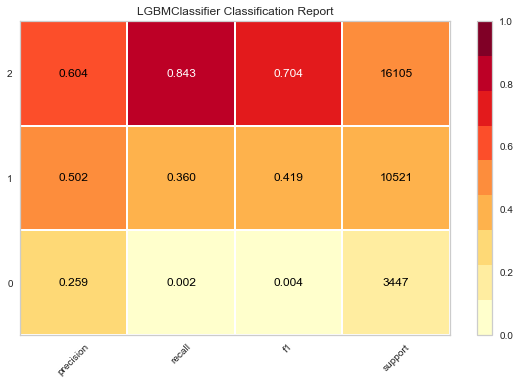

In [37]:
plot_model(tuned_lgbm, plot = 'class_report')

##### AUC

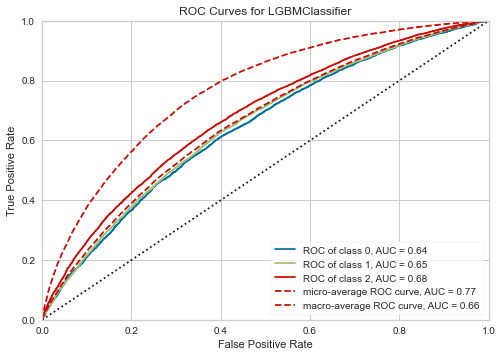

In [38]:
plot_model(tuned_lgbm, plot = 'auc')

##### Feature Importance

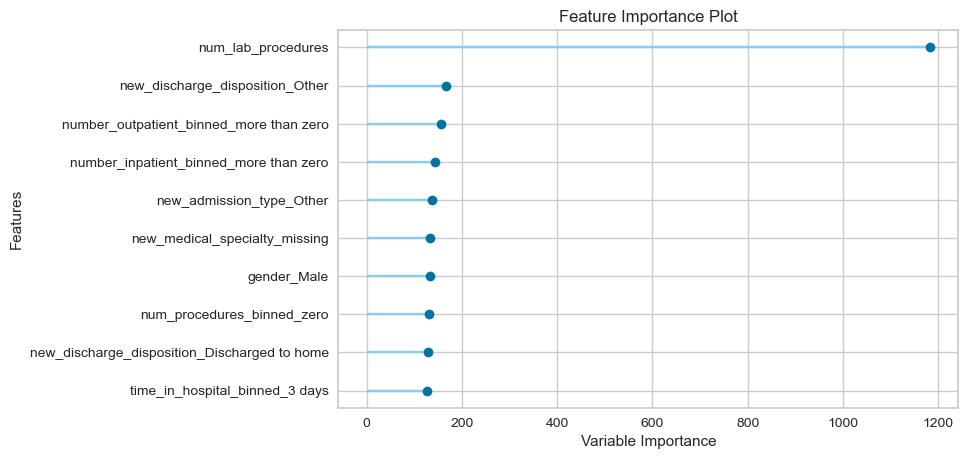

In [39]:
plot_model(tuned_lgbm, plot = 'feature')

##### Decision Boundary Plot

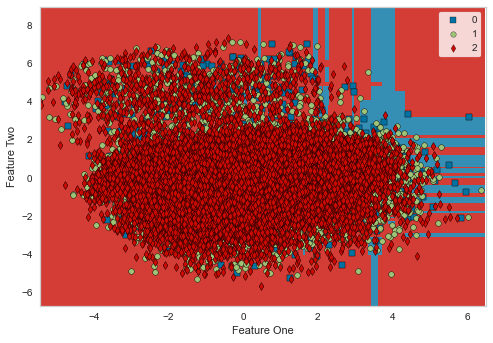

In [40]:
plot_model(tuned_lgbm, plot = 'boundary')

##### Prediction Error Plot

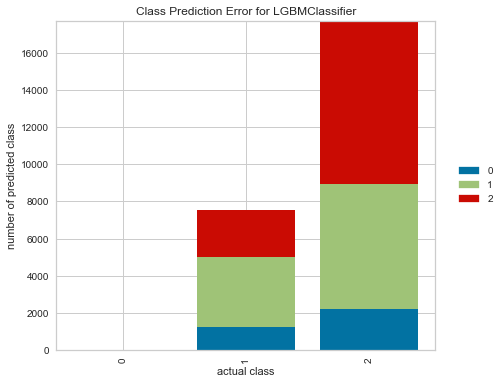

In [41]:
plot_model(tuned_lgbm, plot = 'error')

### Prediction

#### Random Forest Classifier

In [42]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5617,0,0.3670,0.4889,0.4614,0.0921,0.1389


##### Light Gradient Boosting Machine

In [43]:
predict_model(tuned_xgboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.5780,0.6637,0.4025,0.5283,0.5248,0.1759,0.1922


##### Extreme Gradient Boosting

In [44]:
predict_model(tuned_lgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5777,0.6649,0.4017,0.5284,0.5238,0.1743,0.1909
